In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asl-dataset/asl_dataset/n/hand2_n_dif_seg_3_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand1_n_left_seg_5_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand2_n_top_seg_4_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand1_n_dif_seg_2_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand2_n_top_seg_1_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand3_n_dif_seg_1_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand2_n_dif_seg_2_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand2_n_top_seg_3_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand5_n_dif_seg_4_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand1_n_right_seg_5_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand1_n_left_seg_1_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand2_n_right_seg_4_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand1_n_right_seg_3_cropped.jpeg
/kaggle/input/asl-dataset/asl_dataset/n/hand4_n_bot_seg_2_cropped.jpe

In [3]:
pip install caer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 3.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 34.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install canaro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 13.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 44.1 MB/s eta 0:00:0000:01:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 34.9 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.1.1
    Uninstalling typing_extensions-4.1.1:
      Successfully uninstalled typing_extensions-4.1.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.10.1
    Uninstalling tensorboard-2.10.1:
      Successfully uninstalled tensorboard-2.10.1
ERROR: pip's dependency resolver does not currently take into ac

In [5]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import LearningRateScheduler

In [6]:
IMG_SIZE = (80,80)
channels = 1
char_path = r'/kaggle/input/asl-dataset/asl_dataset/'

In [7]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))

In [8]:
char_dict

{'n': 70,
 '7': 70,
 'r': 70,
 '2': 70,
 'b': 70,
 'i': 70,
 'f': 70,
 'h': 70,
 '5': 70,
 'e': 70,
 'u': 70,
 'm': 70,
 '8': 70,
 'x': 70,
 '0': 70,
 'asl_dataset': 36,
 'k': 70,
 'q': 70,
 'y': 70,
 's': 70,
 'g': 70,
 'a': 70,
 'o': 70,
 't': 65,
 'v': 70,
 'z': 70,
 '3': 70,
 '1': 70,
 'c': 70,
 '4': 70,
 'p': 70,
 '9': 70,
 'l': 70,
 '6': 70,
 'w': 70,
 'd': 70,
 'j': 70}

In [9]:
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count += 1
    if count >= len(char_dict):
        break
characters

['n',
 '7',
 'r',
 '2',
 'b',
 'i',
 'f',
 'h',
 '5',
 'e',
 'u',
 'm',
 '8',
 'x',
 '0',
 'a',
 'k',
 'q',
 'y',
 's',
 'g',
 'a',
 'o',
 't',
 'v',
 'z',
 '3',
 '1',
 'c',
 '4',
 'p',
 '9',
 'l',
 '6',
 'w',
 'd',
 'j']

In [10]:
train = caer.preprocess_from_dir(char_path, characters, channels=channels, IMG_SIZE=IMG_SIZE, isShuffle=True)


[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] 70 files found in 0.0009560585021972656s
[INFO] 70 files found in 0.0008072853088378906s
[INFO] 70 files found in 0.0007617473602294922s
[INFO] 70 files found in 0.0007512569427490234s
[INFO] 70 files found in 0.0008502006530761719s
[INFO] 70 files found in 0.0008604526519775391s
[INFO] 70 files found in 0.0007550716400146484s
[INFO] 70 files found in 0.0011992454528808594s
[INFO] 70 files found in 0.0008425712585449219s
[INFO] 70 files found in 0.0009853839874267578s
[INFO] 70 files found in 0.0008883476257324219s
[INFO] 70 files found in 0.0009365081787109375s
[INFO] 70 files found in 0.0008785724639892578s
[INFO] 70 files found in 0.0008406639099121094s
[INFO] 70 files found in 0.17897987365722656s
[INFO] 70 files found in 0.0007884502410888672s
[INFO] 70 files found in 0.0007953643798828125s
[INFO] 70 files found in 0.0007500648498535156s
[INFO] 70 files fou

In [11]:
len(train)

2585

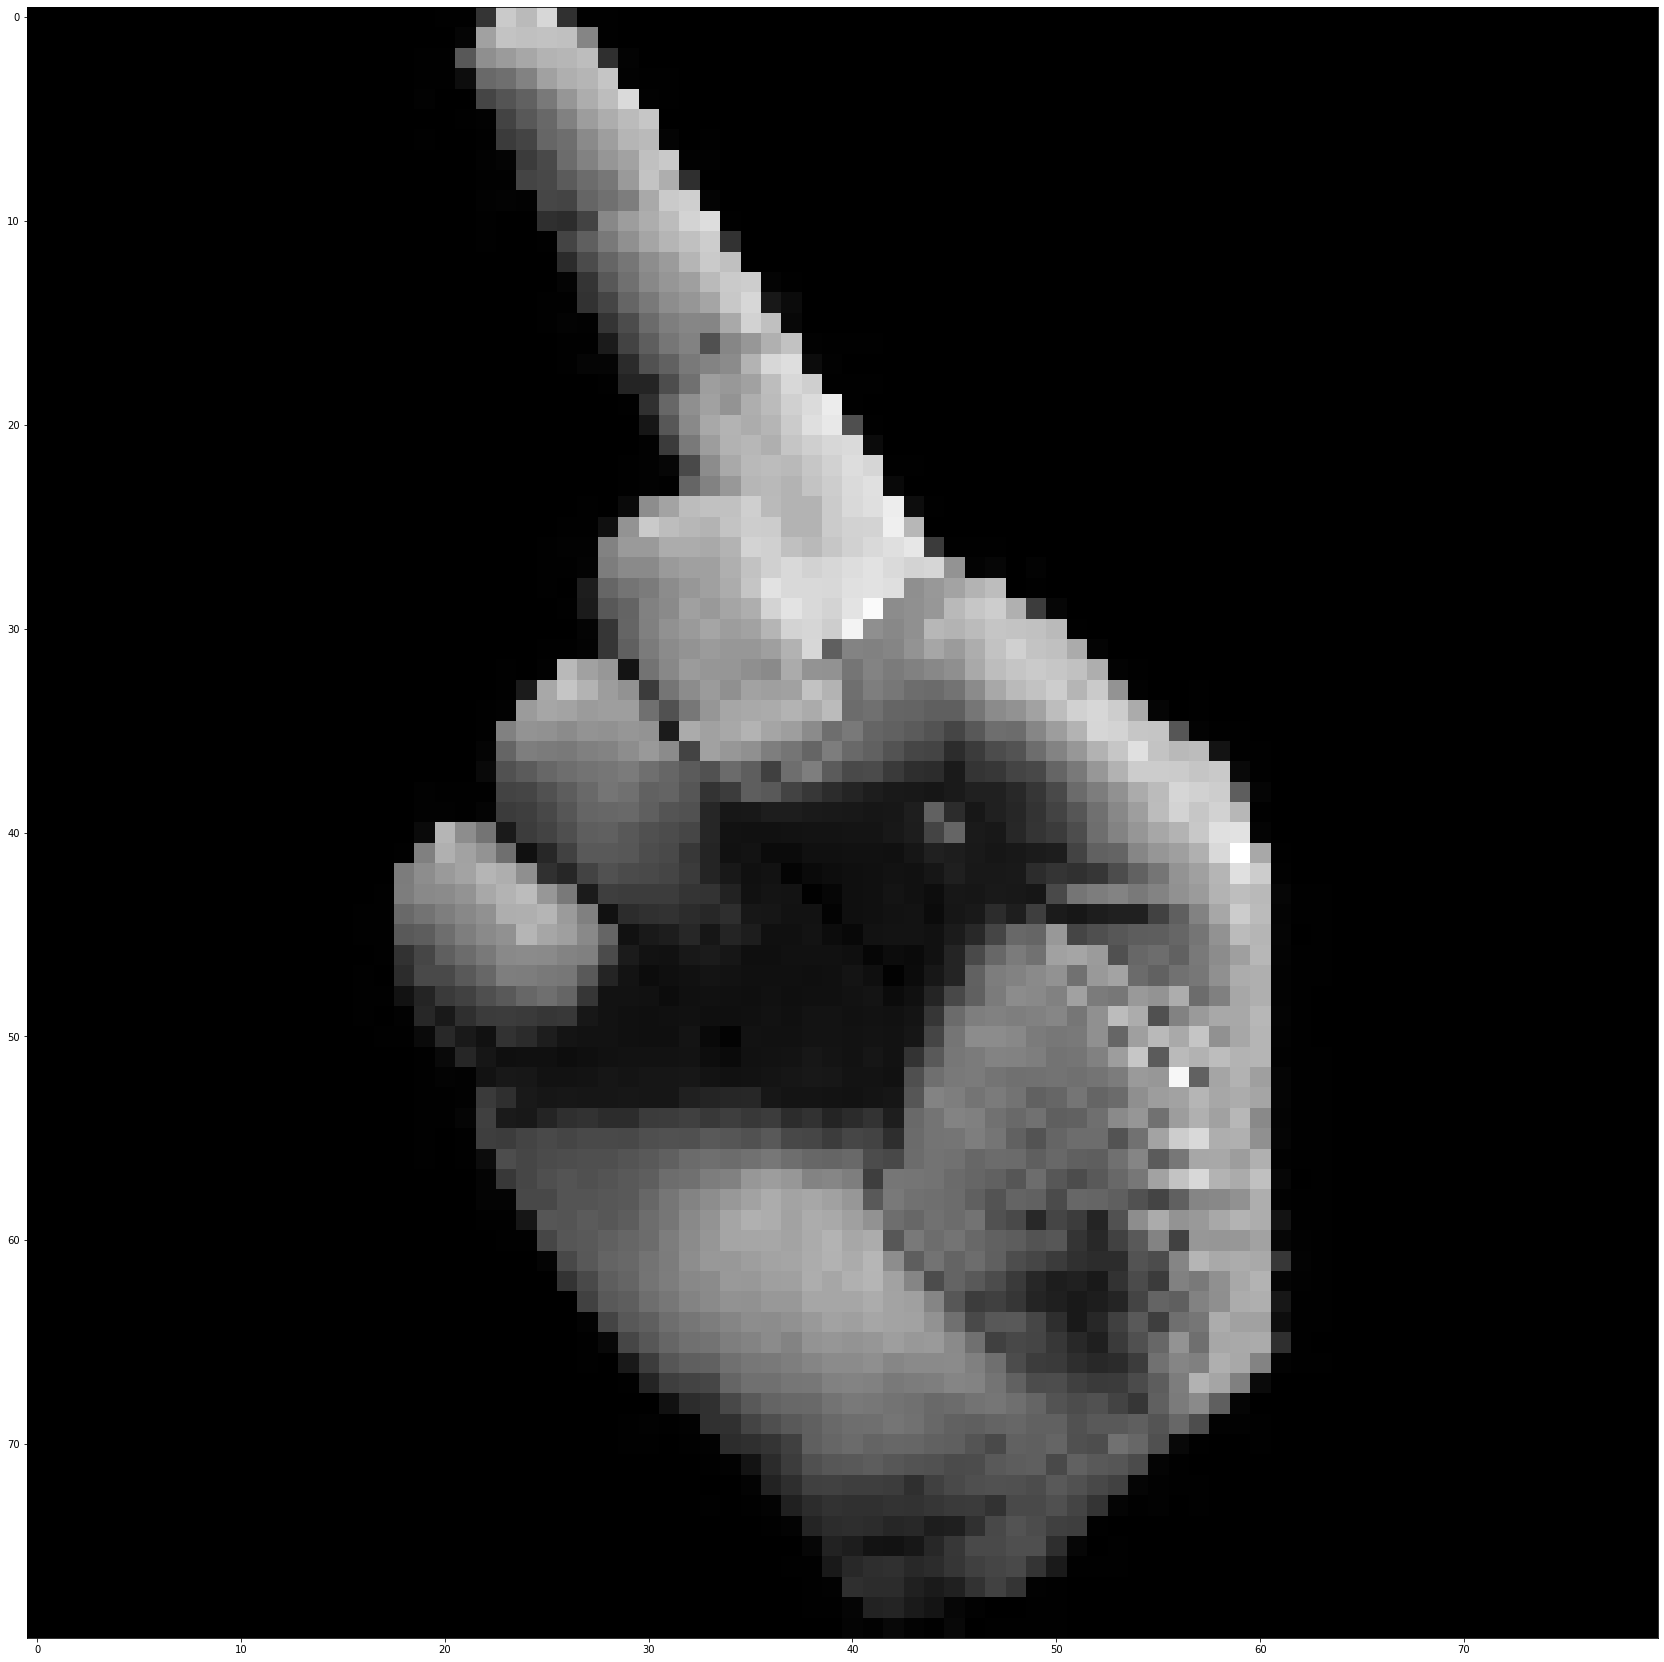

In [12]:
plt.figure(figsize=(30,30))
plt.imshow(train[0][0], cmap='gray')
plt.show()

In [13]:
featureSet, labels = caer.sep_train(train, IMG_SIZE=IMG_SIZE)


In [14]:
featureSet = caer.normalize(featureSet)

In [15]:
labels = to_categorical(labels, len(characters))

In [16]:
pip install caer

Note: you may need to restart the kernel to use updated packages.


In [17]:
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet, labels, val_ratio=.2)


In [18]:
del train
del featureSet
del labels 
gc.collect()

23

In [19]:
BATCH_SIZE = 37
EPOCHS = 10

In [20]:
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train, y_train, batch_size=BATCH_SIZE)

In [21]:
model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE, channels=channels, output_dim=len(characters), 
                                         loss='binary_crossentropy', decay=1e-6, learning_rate=0.001, momentum=0.9,
                                         nesterov=True)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 80, 80, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 78, 78, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 39, 39, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 18, 18, 64)       

/opt/conda/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [22]:
pip install canaro

Note: you may need to restart the kernel to use updated packages.


In [23]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]
training = model.fit(train_gen,
                    steps_per_epoch=len(x_train)//BATCH_SIZE,
                    epochs=EPOCHS,
                    validation_data=(x_val,y_val),
                    validation_steps=len(y_val)//BATCH_SIZE,
                    callbacks = callbacks_list)


Epoch 1/10
55/55 [==============================] - 10s 37ms/step - loss: 0.4486 - accuracy: 0.0300 - val_loss: 0.1447 - val_accuracy: 0.0579
Epoch 2/10
55/55 [==============================] - 2s 30ms/step - loss: 0.1269 - accuracy: 0.0404 - val_loss: 0.1275 - val_accuracy: 0.0579
Epoch 3/10
55/55 [==============================] - 2s 35ms/step - loss: 0.1256 - accuracy: 0.0458 - val_loss: 0.1268 - val_accuracy: 0.0579
Epoch 4/10
55/55 [==============================] - 2s 31ms/step - loss: 0.1243 - accuracy: 0.0532 - val_loss: 0.1263 - val_accuracy: 0.0579
Epoch 5/10
55/55 [==============================] - 2s 31ms/step - loss: 0.1240 - accuracy: 0.0571 - val_loss: 0.1249 - val_accuracy: 0.0579
Epoch 6/10
55/55 [==============================] - 2s 32ms/step - loss: 0.1228 - accuracy: 0.0655 - val_loss: 0.1237 - val_accuracy: 0.0579
Epoch 7/10
55/55 [==============================] - 2s 31ms/step - loss: 0.1216 - accuracy: 0.0655 - val_loss: 0.1228 - val_accuracy: 0.0676
Epoch 8/10
5

In [24]:
print(characters)


['n', '7', 'r', '2', 'b', 'i', 'f', 'h', '5', 'e', 'u', 'm', '8', 'x', '0', 'a', 'k', 'q', 'y', 's', 'g', 'a', 'o', 't', 'v', 'z', '3', '1', 'c', '4', 'p', '9', 'l', '6', 'w', 'd', 'j']


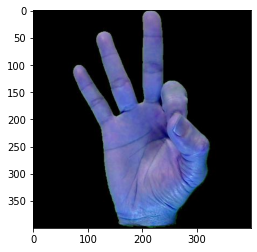

In [33]:

test_path = r'/kaggle/input/asl-dataset/asl_dataset/9/hand1_9_bot_seg_1_cropped.jpeg'

img = cv.imread(test_path)

plt.imshow(img)
plt.show()

In [34]:
def prepare(image):
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, IMG_SIZE)
    image = caer.reshape(image, IMG_SIZE, 1)
    return image



In [35]:
predictions = model.predict(prepare(img))

In [36]:
print(characters[np.argmax(predictions[0])])

9


In [39]:
import cv2 as cv
cap = cv.VideoCapture(0)
while True:
    succes,img = cap.read()
    cv.imshow('video',img)
    cv.waitkey(1)

[ WARN:0] global /tmp/pip-req-build-jpmv6t9_/opencv/modules/videoio/src/cap_v4l.cpp (890) open VIDEOIO(V4L2:/dev/video0): can't open camera by index


error: OpenCV(4.5.4) /tmp/pip-req-build-jpmv6t9_/opencv/modules/highgui/src/window.cpp:1006: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'imshow'
